# Acquire data

First we will download packages we need to run our code.

In [4]:
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_titanic_data, get_iris_data

### 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [7]:
df_iris = data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Print the first 3 rows.**

In [9]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


**Print the number of rows and columns (shape).**

In [11]:
df_iris.shape

(150, 5)

**Print the column names.**

In [14]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

**Print the data type of each column.**

In [15]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

**Print the summary statistics for each of the numeric variables.**

In [16]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Would you recommend rescaling the data based on these statistics?**

We should likely rescale because the magnitude of some of the measurements differs significantly. For example, the minimum petal width is 0.1, whereas the maximum sepal length is 7.9.

### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [47]:
df_excel= pd.read_excel (r'/Users/malachihale/Downloads/Untitled spreadsheet.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


In [54]:
df_excel = df_excel.drop(columns = ["Unnamed: 12", "Unnamed: 13"])

**Assign the first 100 rows to a new dataframe, df_excel_sample**

In [55]:
df_excel_sample = df_excel.head(100)

**Print the number of rows of your original dataframe.**

In [56]:
df_excel.shape[1]

12

**Print the first 5 column names.**

In [57]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

**Print the column names that have a data type of object.**

In [58]:
objects = df_excel.dtypes == object
df_excel.columns[objects]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

**Compute the range for each of the numeric variables.**

In [59]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

All of our values are either numeric of objects, so we can use that to isolate just the numeric values.

In [64]:
numeric = df_excel.dtypes != object
maximums = df_excel.max()[numeric] 
minimums = df_excel.min()[numeric]
maximums - minimums

is_senior_citizen         1
phone_service             2
internet_service          2
contract_type             2
monthly_charges       100.5
total_charges        8666.0
dtype: object

### 3. Read date from the google sheet linked in the textbook into a dataframe.

In [67]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Print the first three rows.**

In [68]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Print the number of rows and columns.**

In [69]:
df_google.shape

(891, 12)

**Print the column names**

In [70]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Print the datatype of each column.**

In [71]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Print the summary statistics for each of the numeric variables**

In [83]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Print the unique values for each of your categorical variables.**

In [91]:
df_google.Survived.unique()

array([0, 1])

In [93]:
df_google.Sex.unique()

array(['male', 'female'], dtype=object)

In [96]:
df_google.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Data Preparation

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

#### Use the function defined in acquire.py to load the iris dataset.

In [5]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


#### Drop the species_id and measurement_id columns.

In [6]:
df = df.drop(columns='species_id')
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


#### Rename the species_name column to just species.

In [7]:
df = df.rename(columns={"species_name": "species"})
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [8]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

There are three unique species in the dataframe.

#### Create dummy variables of the species name.

In [9]:
df_dummy = pd.get_dummies(df[['species']], dummy_na=False, drop_first = True)
df_dummy.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Now we'll append the dummy values to the dataframe.

In [10]:
df = pd.concat([df, df_dummy], axis = 1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [11]:
def clean_data(df):
    df.drop_duplicates(inplace=True)
    df.drop(columns=['species_id'], inplace=True)
    df = df.rename(columns={"species_name": "species"})
    dummy_df = pd.get_dummies(df[['species']], drop_first=True)
    return pd.concat([df, dummy_df], axis=1)

In [12]:
def prep_iris(df):
    df = clean_data(df)
    return df

In [13]:
df = acquire.get_iris_data()
df = prep_iris(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


# Exploratory Analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data, get_iris_data
from prepare import prep_iris

import seaborn as sns
from sklearn.model_selection import train_test_split
import explore
import acquire
import prepare

## Section 1 - iris_db

### Acquire, prepare, and split your data.

**Acquire**

In [6]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


**Prepare**

In [7]:
df = prepare.prep_iris(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


**Split**

In [8]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.8, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [9]:
train, validate, test = train_validate_test_split(df, target='species_versicolor')
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0


In [10]:
print(train.shape, validate.shape, test.shape)

(23, 7) (96, 7) (30, 7)


## Univariate Stats

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             149 non-null    object 
 1   sepal_length        149 non-null    float64
 2   sepal_width         149 non-null    float64
 3   petal_length        149 non-null    float64
 4   petal_width         149 non-null    float64
 5   species_versicolor  149 non-null    uint8  
 6   species_virginica   149 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


We will define categorical and quantitative variable. 

In [30]:
cat_vars = ['species', 'species_versicolor', 'species_virginica']

In [31]:
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

We have four quantitative variables: sepal length, sepal width, petal length, petal width. 

**Sepal length**

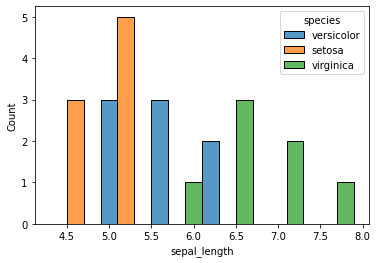

In [85]:
sepal_length_historgram = sns.histplot(data=train, x="sepal_length", hue="species", multiple="dodge")

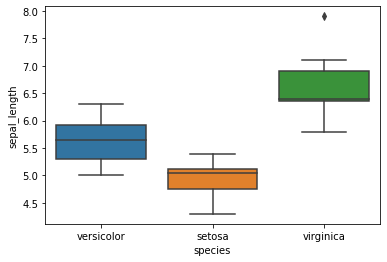

In [86]:
sepal_length_box_plot = sns.boxplot(data=train, x = 'species', y="sepal_length")

In [87]:
train.sepal_length.describe()

count    23.000000
mean      5.704348
std       0.865752
min       4.300000
25%       5.050000
50%       5.600000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64

**Sepal width**

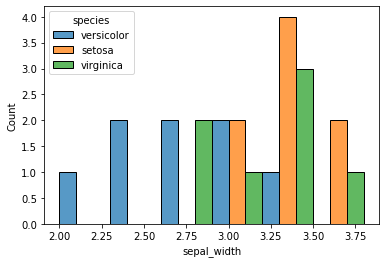

In [88]:
sepal_width_histogram = sns.histplot(data=train, x="sepal_width", hue="species", multiple = 'dodge')

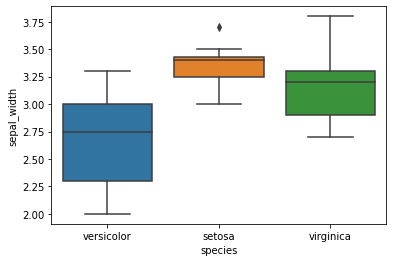

In [89]:
sepal_width_boxplot = sns.boxplot(data = train, x = 'species', y = 'sepal_width')

In [90]:
train.sepal_width.describe()

count    23.000000
mean      3.056522
std       0.449066
min       2.000000
25%       2.800000
50%       3.100000
75%       3.350000
max       3.800000
Name: sepal_width, dtype: float64

**Petal length**

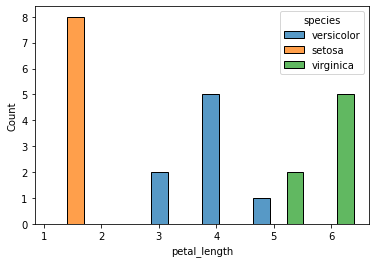

In [91]:
petal_length_histogram = sns.histplot(data=train, x="petal_length", hue="species", multiple="dodge")

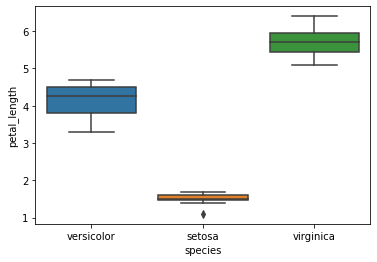

In [92]:
petal_length_boxplot = sns.boxplot(data=train, x='species', y='petal_length')

In [93]:
train.petal_length.describe()

count    23.000000
mean      3.686957
std       1.810400
min       1.100000
25%       1.600000
50%       4.100000
75%       5.200000
max       6.400000
Name: petal_length, dtype: float64

**Petal width**

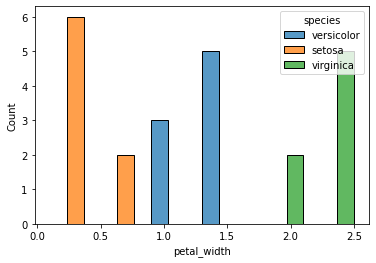

In [94]:
petal_width_histogram = sns.histplot(data=train, x="petal_width", hue="species", multiple="dodge")

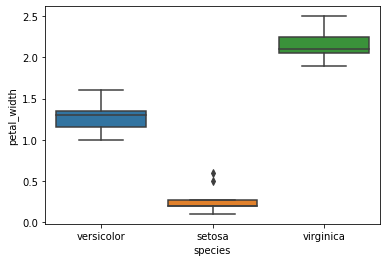

In [95]:
petal_width_boxplot = sns.boxplot(data=train, x='species', y ='petal_width')

In [96]:
train.petal_width.describe()

count    23.000000
mean      1.195652
std       0.799704
min       0.100000
25%       0.350000
50%       1.300000
75%       1.950000
max       2.500000
Name: petal_width, dtype: float64

In [44]:
species_counts = train.species.value_counts()

In [47]:
df_species_counts = pd.DataFrame(species_counts)
df_species_counts

,species
versicolor,8
setosa,8
virginica,7


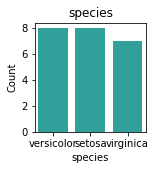

               species  Count  Percent
versicolor  versicolor      8    34.78
setosa          setosa      8    34.78
virginica    virginica      7    30.43
_________________________________________________________________


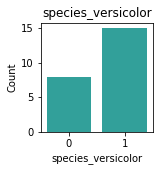

   species_versicolor  Count  Percent
0                   1     15    65.22
1                   0      8    34.78
_________________________________________________________________


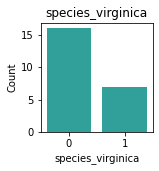

   species_virginica  Count  Percent
0                  0     16    69.57
1                  1      7    30.43
_________________________________________________________________


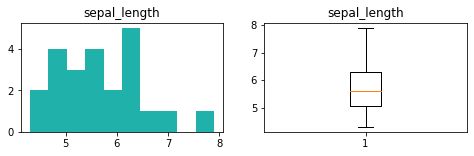

count    23.000000
mean      5.704348
std       0.865752
min       4.300000
25%       5.050000
50%       5.600000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64


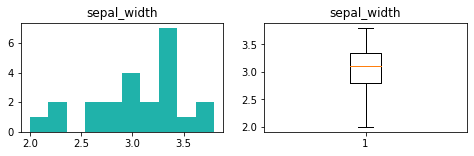

count    23.000000
mean      3.056522
std       0.449066
min       2.000000
25%       2.800000
50%       3.100000
75%       3.350000
max       3.800000
Name: sepal_width, dtype: float64


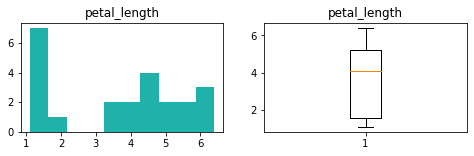

count    23.000000
mean      3.686957
std       1.810400
min       1.100000
25%       1.600000
50%       4.100000
75%       5.200000
max       6.400000
Name: petal_length, dtype: float64


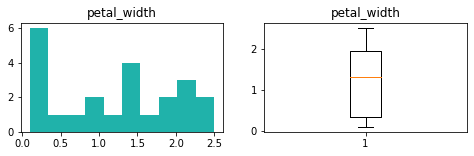

count    23.000000
mean      1.195652
std       0.799704
min       0.100000
25%       0.350000
50%       1.300000
75%       1.950000
max       2.500000
Name: petal_width, dtype: float64


In [17]:
explore.explore_univariate(train, cat_vars, quant_vars)

### Document any key takeaways and actions. 

There is roughly even amount of species. None of the quantitative data looks normally distributed.

## Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

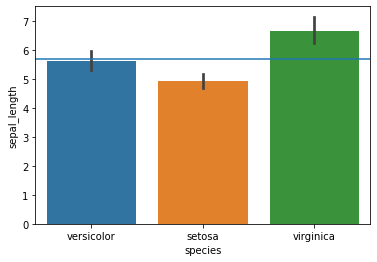

In [60]:
sepal_length_species = sns.barplot(data=train, x = 'species', y =
'sepal_length') 
average = (train["sepal_length"].sum())/(len(train["sepal_length"]))
sepal_length_species.axhline(average)

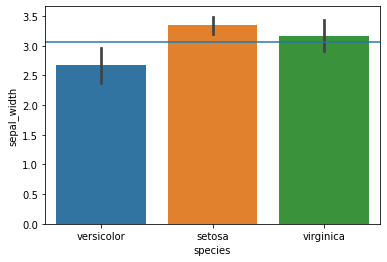

In [61]:
sepal_width_species = sns.barplot(data=train, x = 'species', y =
'sepal_width') 
average = train['sepal_width'].mean()
sepal_width_species.axhline(average)

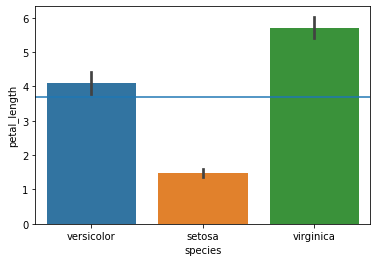

In [62]:
petal_length_species = sns.barplot(data=train, x = 'species', y =
'petal_length') 
average = train['petal_length'].mean()
petal_length_species.axhline(average)

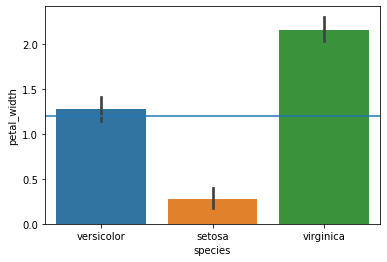

In [63]:
petal_width_species = sns.barplot(data=train, x = 'species', y =
'petal_width') 
average = train['petal_width'].mean()
petal_width_species.axhline(average)

### For each measurement type, compute the descriptive statistics for each species.

In [85]:
descriptive_sepal_length = train.groupby("species")["sepal_length"].describe()

In [86]:
descriptive_sepal_width = train.groupby("species")["sepal_width"].describe()

In [87]:
descriptive_petal_length = train.groupby("species")["petal_length"].describe()

In [88]:
descriptive_petal_length = train.groupby("species")["petal_width"].describe()

In [89]:
descriptive_sepal_length

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,4.937500,0.354310,4.3,4.75,5.05,5.125,5.4
versicolor,8.0,5.637500,0.504090,5.0,5.30,5.65,5.925,6.3
virginica,7.0,6.657143,0.675419,5.8,6.35,6.40,6.900,7.9


In [90]:
descriptive_sepal_width

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,3.350000,0.220389,3.0,3.25,3.40,3.425,3.7
versicolor,8.0,2.675000,0.439968,2.0,2.30,2.75,3.000,3.3
virginica,7.0,3.157143,0.369040,2.7,2.90,3.20,3.300,3.8


In [91]:
descriptive_petal_length

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,0.275000,0.175255,0.1,0.20,0.2,0.275,0.6
versicolor,8.0,1.275000,0.212132,1.0,1.15,1.3,1.350,1.6
virginica,7.0,2.157143,0.198806,1.9,2.05,2.1,2.250,2.5


In [92]:
descriptive_petal_length

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,8.0,0.275000,0.175255,0.1,0.20,0.2,0.275,0.6
versicolor,8.0,1.275000,0.212132,1.0,1.15,1.3,1.350,1.6
virginica,7.0,2.157143,0.198806,1.9,2.05,2.1,2.250,2.5


### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [98]:
from scipy.stats import mannwhitneyu
from scipy import stats

In [104]:
x = train[train["species"] == "virginica"]
y = train[train["species"] == "versicolor"]

In [105]:
stats.mannwhitneyu(x['petal_width'], y['petal_width'], use_continuity=True)

MannwhitneyuResult(statistic=0.0, pvalue=0.0006878678923405625)

In [106]:
stats.mannwhitneyu(x['sepal_length'], y['sepal_length'], use_continuity=True)

MannwhitneyuResult(statistic=3.5, pvalue=0.002595115141281533)

In [107]:
stats.mannwhitneyu(x['sepal_width'], y['sepal_width'], use_continuity=True)

MannwhitneyuResult(statistic=12.0, pvalue=0.03501954738174966)

In [108]:
stats.mannwhitneyu(x['petal_length'], y['petal_length'], use_continuity=True)

MannwhitneyuResult(statistic=0.0, pvalue=0.0007228903504473763)

There is a significant difference between the two groups for every category except sepal width.

### Document takeaways & any actions

There are huge differences in petal length and width among species, a minor difference in sepal length, and no difference in sepal width.

## Multivariate Stats

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [111]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
23,setosa,5.1,3.3,1.7,0.5,0,0
102,virginica,7.1,3.0,5.9,2.1,0,1
39,setosa,5.1,3.4,1.5,0.2,0,0


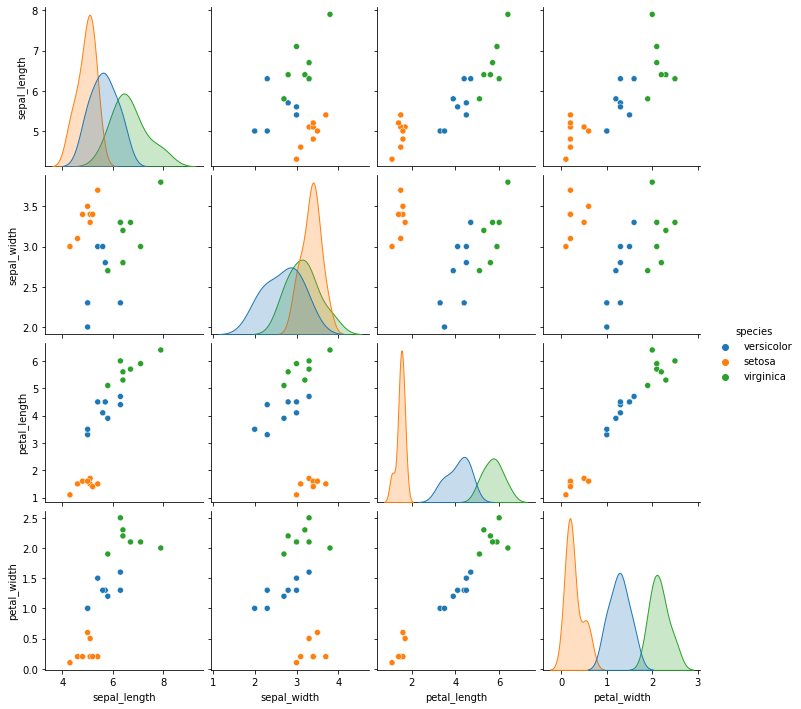

In [115]:
train_pairplot = sns.pairplot(train.iloc[:,:-2], hue="species")

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [118]:
train_tidy = train.iloc[:,:-2].melt(id_vars=['species'], var_name = "measurement", value_name = "value")

In [120]:
train_tidy.head()

,species,measurement,value
0,versicolor,sepal_length,6.3
1,setosa,sepal_length,4.6
2,setosa,sepal_length,5.1
3,virginica,sepal_length,7.1
4,setosa,sepal_length,5.1


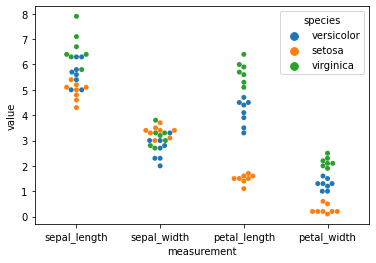

In [123]:
iris_train_data_swarmplot = sns.swarmplot(x="measurement", y="value", data=train_tidy, hue = 'species')

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

My question: is petal area significant different in versicolor compared to in virginica?

$H_0:$ There is no difference between versicolor mean petal area and virginica mean petal area.

$H_{a}:$ There is a significnat difference between versicolor mean petal area and virginica mean petal area.

In [124]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
56,versicolor,6.3,3.3,4.7,1.6,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
23,setosa,5.1,3.3,1.7,0.5,0,0
102,virginica,7.1,3.0,5.9,2.1,0,1
39,setosa,5.1,3.4,1.5,0.2,0,0


In [125]:
train['petal_area'] = train['petal_length'] * train ['petal_width']

In [127]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,petal_area
56,versicolor,6.3,3.3,4.7,1.6,1,0,7.52
3,setosa,4.6,3.1,1.5,0.2,0,0,0.30
23,setosa,5.1,3.3,1.7,0.5,0,0,0.85
102,virginica,7.1,3.0,5.9,2.1,0,1,12.39
39,setosa,5.1,3.4,1.5,0.2,0,0,0.30


In [128]:
x = train[train["species"] == "virginica"]
y = train[train["species"] == "versicolor"]

In [129]:
stats.mannwhitneyu(x['petal_area'], y['petal_area'], use_continuity=True)

MannwhitneyuResult(statistic=0.0, pvalue=0.0007300309581211239)

We reject the null hypothesis. There is a significant difference between virginica petal area and versicolor petal area.

### Document takeaways and any actions.

Petal width values appear to have the widest distribution of any measurement.